# Credit Card fraud detection - Using Ensemble Learning & KNN

#### Partners for this Homework are:
Pinaki Bhagat   
Sydney Correa

We explored ensemble learning algorithms (RandomForest, ExtraTrees, AdaBoost, GradientBoost, XGBoost) and KNN to figure out the change in accuracy of predicting the fraudulent transactions in the credit card dataset.  
  
Dataset  
The datasets contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.  
Due to confidentiality of data, original features are masked and the dataset contains only numerical input variables which are the result of a PCA transformation. Features “Time” and “Amount” are not transformed and indicates the seconds elapsed between each transaction and the first transaction in the dataset and transaction amount respectively.

##### Import all python libraries

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt



from datetime import datetime
import requests
from io import BytesIO
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.manifold import TSNE

# special matplotlib command for global plot configuration
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

import sklearn
from sklearn import neighbors, decomposition, metrics, preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn import decomposition, preprocessing
from scipy.spatial import distance

import math
import warnings


#RANDOM_SEED=42
SEED = 0 # for reproducibility



warnings.simplefilter("ignore")

##### Download credit card dataset

In [3]:
sensor_train = pd.read_csv("creditcard.csv")

print(sensor_train.head)

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.22

##### Drop the 'Time' feature from dataset and scale the amount feature

In [4]:
from sklearn.preprocessing import StandardScaler

data = sensor_train.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [5]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


##### Break the dataframe into train, validation and test set

In [6]:
#X_train, X_test, y_train, y_test = train_test_split(sensor_train, Y, stratify = Y, test_size=0.25, random_state=101)
X= data
X=X.drop(['Class'], axis=1)
y = data['Class']

print(X.head())
y.head()

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10    ...          V20       V21       V22  \
0  0.098698  0.363787  0.090794    ...     0.251412 -0.018307  0.277838   
1  0.085102 -0.255425 -0.166974    ...    -0.069083 -0.225775 -0.638672   
2  0.247676 -1.514654  0.207643    ...     0.524980  0.247998  0.771679   
3  0.377436 -1.387024 -0.054952    ...    -0.208038 -0.108300  0.005274   
4 -0.270533  0.817739  0.753074    ...     0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V28    Amount  
0 -0.110474  0.066928  0

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [39]:
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, stratify = y, test_size=0.4, random_state=SEED)
X_Val, X_test, y_Val, y_test = train_test_split(X_test1, y_test1, stratify = y_test1, test_size=0.5, random_state=SEED)

In [ ]:
X_Val=X_Val.drop(['Class'], axis=1)
X_test= X_test.drop(['Class'], axis=1)

In [43]:
print('X_train :', X_train.shape)
print('X_test1 :', X_test1.shape)
print('y_train :', y_train.shape)
print('y_test1 :', y_test1.shape)
print('X_Val :', X_Val.shape)
print('X_test :', X_test.shape)
print('y_Val :', y_Val.shape)
print('y_test :', y_test.shape)



X_train : (170884, 29)
X_test1 : (113923, 29)
y_train : (170884,)
y_test1 : (113923,)
X_Val : (56961, 29)
X_test : (56962, 29)
y_Val : (56961,)
y_test : (56962,)


##### This section is to find out the best parameter k for the given dataset. It then trains the model with best hyperparameter k and uses that to predict the class

The optimal number of neighbors is 5


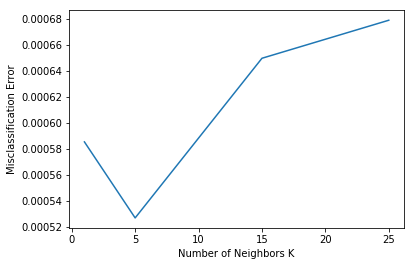

0.999420666409185


NameError: name 'classification_report' is not defined

In [97]:
from sklearn.neighbors import KNeighborsClassifier

#Hyperparameter Tuning for K
#K_list=list(range(1,20))
K_list=[1,5,15,25]


#create empty list
cv_scores=[]

#perform K search
for k in K_list:
    knn=KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    scores=cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    

#Plotting misclassification error

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = K_list[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(K_list, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#Look how the number of neighbors drastically increases the MSE rate

# Try KNN to see how well it predicts fraud on the undersampled dataset
knn=KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_knn_predict=knn.predict(X_test)

##### Print out the classification accuracies including the recall and f1-score. For heavily imbalanced dataset we should rely on precision and f1-score rather then accuracy

In [99]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print (accuracy_score(y_test, y_knn_predict))
print(classification_report(y_test, y_knn_predict))

0.999420666409185
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56863
          1       0.90      0.75      0.82        99

avg / total       1.00      1.00      1.00     56962



##### Compute and display the ROC curve to determine the model behaviour

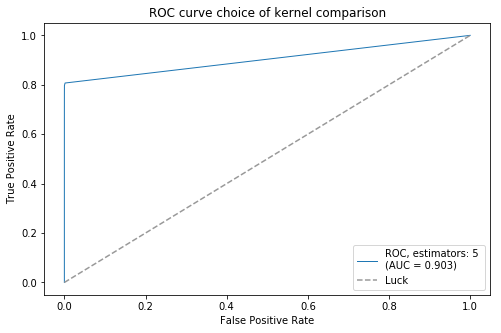

In [104]:
plt.figure(figsize=(8,5))
random_state = np.random.RandomState(37)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []


probas_ = knn.fit(X_train_1,y_train).predict_proba(X_test_1)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test1, probas_[:, 1])
mean_tpr += np.interp(mean_fpr, fpr, tpr)
mean_tpr[0] = 0.0
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC, estimators: %d \n(AUC = %0.3f)' % (knn.n_neighbors, roc_auc))


plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve choice of kernel comparison')
plt.legend(loc="lower right")
plt.show()

##### Define function for confusion matrix

In [86]:
def show_confusion_matrix(cm, target_names):
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title('Confusion matrix')
    plt.set_cmap('Blues')
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks, target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

##### Create helper function to be used for ensemble methods

In [10]:
# Some useful parameters which will come in handy later on
from sklearn.model_selection import KFold
ntrain = X_train.shape[0]
ntest = X_test1.shape[0]

NFOLDS = 10 # set folds for out-of-fold prediction
kf = KFold(n_splits= NFOLDS,shuffle=True, random_state=SEED)

# Sklearn classifier
class SklearnHelper:
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, X_train, y_train):
        self.clf.fit(X_train, y_train)

    def predict(self, x):
        return self.clf.predict(X)
    
    def predict_proba(self, x):
        return self.clf.predict_proba(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
    

##### Define function to obtain the Out of fold predictions

In [37]:
def get_oof(clf, X_train, y_train, X_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    #print(X_train.head())
    
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        #print('i: ',i, 'train: ',train_index, test_index)
        x_tr = X_train.iloc[train_index]
        y_tr = y_train.iloc[train_index]
        x_te = X_train.iloc[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict_proba(x_te)[:,1]
        oof_test_skf[i, :] = clf.predict_proba(X_test)[:,1]

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [13]:
def get_oof_tst(clf, X_test):
    #oof_test_skf1 = np.empty(ntest)

    oof_test_skf = clf.predict_proba(X_test)[:,1]

    return  oof_test_skf.reshape(-1, 1)

In [65]:
def get_oof_f1(clf1, train, test):

    oof_f1_score = f1_score(train,clf1.predict(test))  
    
    return oof_f1_score

In [66]:
def get_oof_auc(clf1, train, test):

    oof_auc = roc_auc_score(train,clf1.predict(test))  
    
    return oof_auc

##### Using the tuned hyperparameters generate base first models

In [47]:
# Put in our parameters for said classifiers

n_estimators=16

# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': n_estimators,
    'max_depth': 10,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':n_estimators,
    'max_depth': 10,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': n_estimators,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': n_estimators,
    'max_depth': 10,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025, 
    'probability':True
}

# Support Vector Classifier parameters 
knn_params = {
    'max_samples' : n_estimators,
    'max_features' : 10 
}





##### Create objects using helper function to execute the ensemble models

In [48]:
# Create 5 objects that represent our 4 models
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
#from sklearn.ensemble import BaggingClassifier
#from sklearn.neighbors import KNeighborsClassifier

rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
#svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

##### Execute ExtraTrees clasifier to obtain the train and test scores

In [49]:
# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, X_train, y_train, X_test1) # Extra Trees

##### Execute RandomForest clasifier to obtain the train and test scores

In [50]:
# Create our OOF train and test predictions. These base results will be used as new features
rf_oof_train, rf_oof_test = get_oof(rf,X_train, y_train, X_test1) # Random Forest

##### Execute AdaBoost clasifier to obtain the train and test scores

In [51]:
# Create our OOF train and test predictions. These base results will be used as new features
ada_oof_train, ada_oof_test = get_oof(ada, X_train, y_train, X_test1) # AdaBoost 


##### Execute GradientBoost clasifier to obtain the train and test scores

In [52]:
# Create our OOF train and test predictions. These base results will be used as new features
gb_oof_train, gb_oof_test = get_oof(gb,X_train, y_train, X_test1) # Gradient Boost


##### Using ensemble models defined above capture the oof train and test predictions

In [68]:
# Create our OOF train and test predictions. These base results will be used as new features
et_oof_test1 = get_oof_tst(et, X_Val) # Extra Trees
#et_oof_f1_scr = get_oof_f1(et, y_Val, X_Val) # Extra Trees
#et_oof_auc = get_oof_auc(et, y_Val, X_Val) # Extra Trees

rf_oof_test1 = get_oof_tst(rf, X_Val) # Random Forest
#rf_oof_f1_scr = get_oof_f1(rf, y_Val, X_Val) # Random Forest
#et_oof_auc = get_oof_auc(rf, y_Val, X_Val) # Random Forest

ada_oof_test1 = get_oof_tst(ada, X_Val) # ADA Boost
#ada_oof_f1_scr = get_oof_f1(ada, X_Val) # ADA Boost
#et_oof_auc = get_oof_auc(ada, X_Val) # ADA Boost

gb_oof_test1 = get_oof_tst(gb, X_Val) # Gradient Boost
#gb_oof_f1_scr = get_oof_f1(gb, X_Val) # Gradient Boost
#et_oof_auc = get_oof_auc(gb, X_Val) # Gradient Boost

print("done")


done


##### Second level learning model via XGBoost

In [70]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'ExtraTrees': et_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
     'GradientBoost': gb_oof_train.ravel()
     })

base_predictions_train.sort_values
base_predictions_train.head()

,AdaBoost,ExtraTrees,GradientBoost,RandomForest
0,0.278610,0.000171,0.000346,0.000128
1,0.042268,0.008257,0.000353,0.000136
2,0.280778,0.000221,0.000360,0.000144
3,0.291032,0.000237,0.000376,0.000304
4,0.276816,0.000298,0.000363,0.000098


##### Check model correlation

In [71]:
base_predictions_train.corr()

,AdaBoost,ExtraTrees,GradientBoost,RandomForest
AdaBoost,1.000000,0.123530,0.107517,0.124163
ExtraTrees,0.123530,1.000000,0.792294,0.963315
GradientBoost,0.107517,0.792294,1.000000,0.823572
RandomForest,0.124163,0.963315,0.823572,1.000000


##### Second level learning via XGBoost, drop the ExtraTrees model as it's highly correlated with GB and RF models

In [73]:
X_train_1 = np.concatenate((rf_oof_train, ada_oof_train, gb_oof_train ), axis=1)
X_test_1 = np.concatenate((rf_oof_test, ada_oof_test, gb_oof_test), axis=1)

In [74]:
X_test_new = np.concatenate((rf_oof_test1, ada_oof_test1, gb_oof_test1), axis=1)

In [79]:
#!pip install xgboost

    100% |████████████████████████████████| 16.6MB 3.2MB/s eta 0:00:01    88% |████████████████████████████▎   | 14.7MB 59.8MB/s eta 0:00:01
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [80]:
import xgboost as xgb
gbm = xgb.XGBClassifier(
 learning_rate = 0.02,
 n_estimators= 16,
 max_depth= 10,  
 min_child_weight= 1,
 gamma=0.9,   #Regularization parameter                     
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_train_1, y_train)

predictions = gbm.predict_proba(X_test_1)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,predictions[:,1]>0.5)

0.9994733284762515

##### Check confusion matrix

Accuracy score:  99.95% 

Classification report: 
             precision    recall  f1-score   support

   Output 0       1.00      1.00      1.00    113726
   Output 1       0.93      0.76      0.83       197

avg / total       1.00      1.00      1.00    113923

Confusion_matrix: 
 [[113714     12]
 [    48    149]]


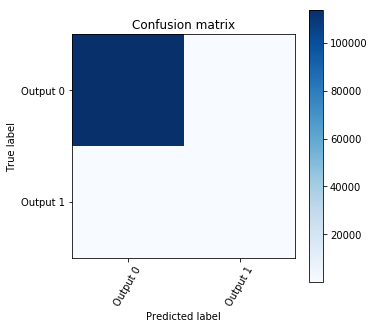

In [87]:
targets =['Output 0','Output 1']

score = metrics.accuracy_score(y_test1,predictions[:,1]>0.5)
print ("Accuracy score:  {:.2%} \n".format(score))

print ("Classification report: ")
print(metrics.classification_report(y_test1,predictions[:,1]>0.5, target_names=targets))

# Print out confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test1,predictions[:,1]>0.5)
print ('Confusion_matrix: \n', confusion_matrix)
show_confusion_matrix(confusion_matrix, targets)

##### Generate ROC curve

In [88]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

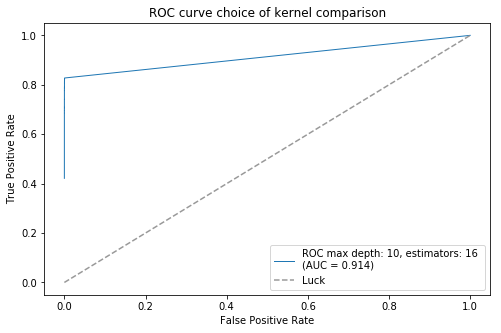

In [90]:
plt.figure(figsize=(8,5))
random_state = np.random.RandomState(37)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []


probas_ = gbm.fit(X_train_1,y_train).predict_proba(X_test_1)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test1, probas_[:, 1])
mean_tpr += np.interp(mean_fpr, fpr, tpr)
mean_tpr[0] = 0.0
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC max depth: %d, estimators: %d \n(AUC = %0.3f)' % (gbm.max_depth, gbm.n_estimators, roc_auc))


plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve choice of kernel comparison')
plt.legend(loc="lower right")
plt.show()